In [19]:
import numpy as np
from qiskit import *
%matplotlib inline

# increment

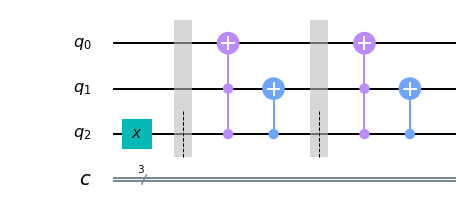

In [26]:
circ = QuantumCircuit(3,3)
circ.x(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier(2)
#circ.measure(0,0)
circ.draw()

In [27]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]


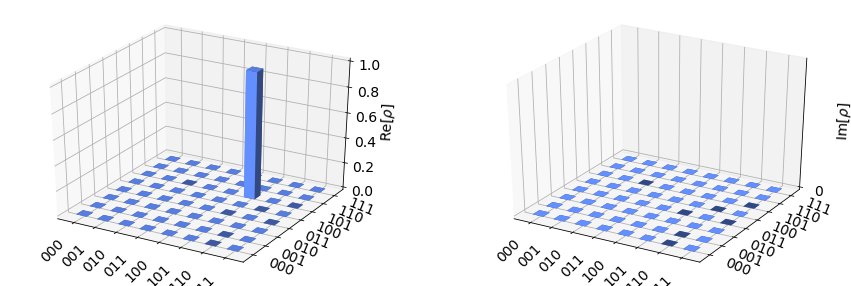

In [28]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

# decrement

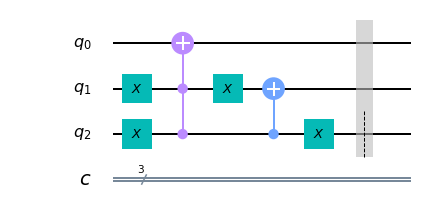

In [23]:
circ = QuantumCircuit(3,3)
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier(2)
#circ.measure(0,0)
circ.draw()

In [24]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


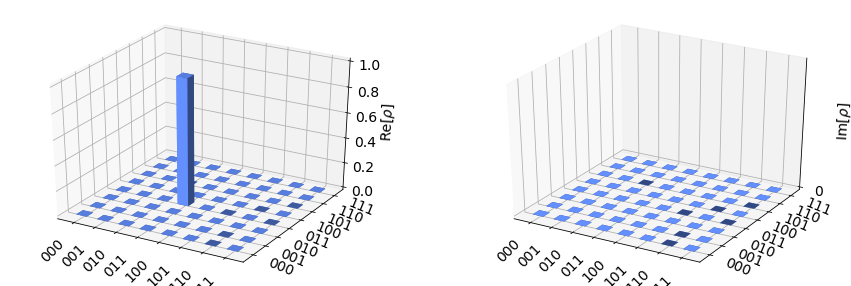

In [25]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)